In [2]:
import json
import numpy as np
import pandas as pd
import pathlib
from pathlib import Path
from complexcgr import FCGR

KMER = 6

In [3]:
m = np.load("/data/bacteria/test-experiments/6mer/fcgr/vibrio_cholerae__01/SAMD00006230.npy") 
m=np.load("/data/bacteria/experiments/autoencoders/6mer/fcgr/burkholderia_pseudomallei__01/SAMEA949364.npy")
m

array([[ 440.,  263.,  566., ...,  333.,  568.,  800.],
       [1181.,  394.,  408., ...,  320., 1030.,  290.],
       [3224., 1439.,  365., ...,  574.,  110.,  263.],
       ...,
       [2956., 1358.,  606., ...,  422.,  779.,  301.],
       [1069.,  346.,  660., ...,  229.,  654.,  583.],
       [ 447.,  451.,  785., ...,  437.,  688.,  783.]])

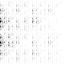

In [4]:
FCGR(6).plot(m)

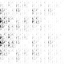

In [5]:
m=np.load("/data/bacteria/experiments/autoencoders/6mer/fcgr/burkholderia_multivorans__01/SAMEA3924732.npy")
FCGR(6).plot(m)

___
Interpolation

In [6]:
list_imgs = list(pathlib.Path("../preds/decoder/").rglob("chlamydia*.npy"))
# list_imgs = sorted(list_imgs, key=lambda p: int(p.stem.split("-")[-1]))
# list_imgs
list_imgs[0]

PosixPath('../preds/decoder/chlamydia_trachomatis-mycobacterium_ulcerans.npy')

In [7]:
# all_inputs = [np.load(p) for p in list_imgs]
all_inputs = np.load(list_imgs[0])

In [8]:
ncols = 5
nrows = int(len(all_inputs) / ncols) + 1   

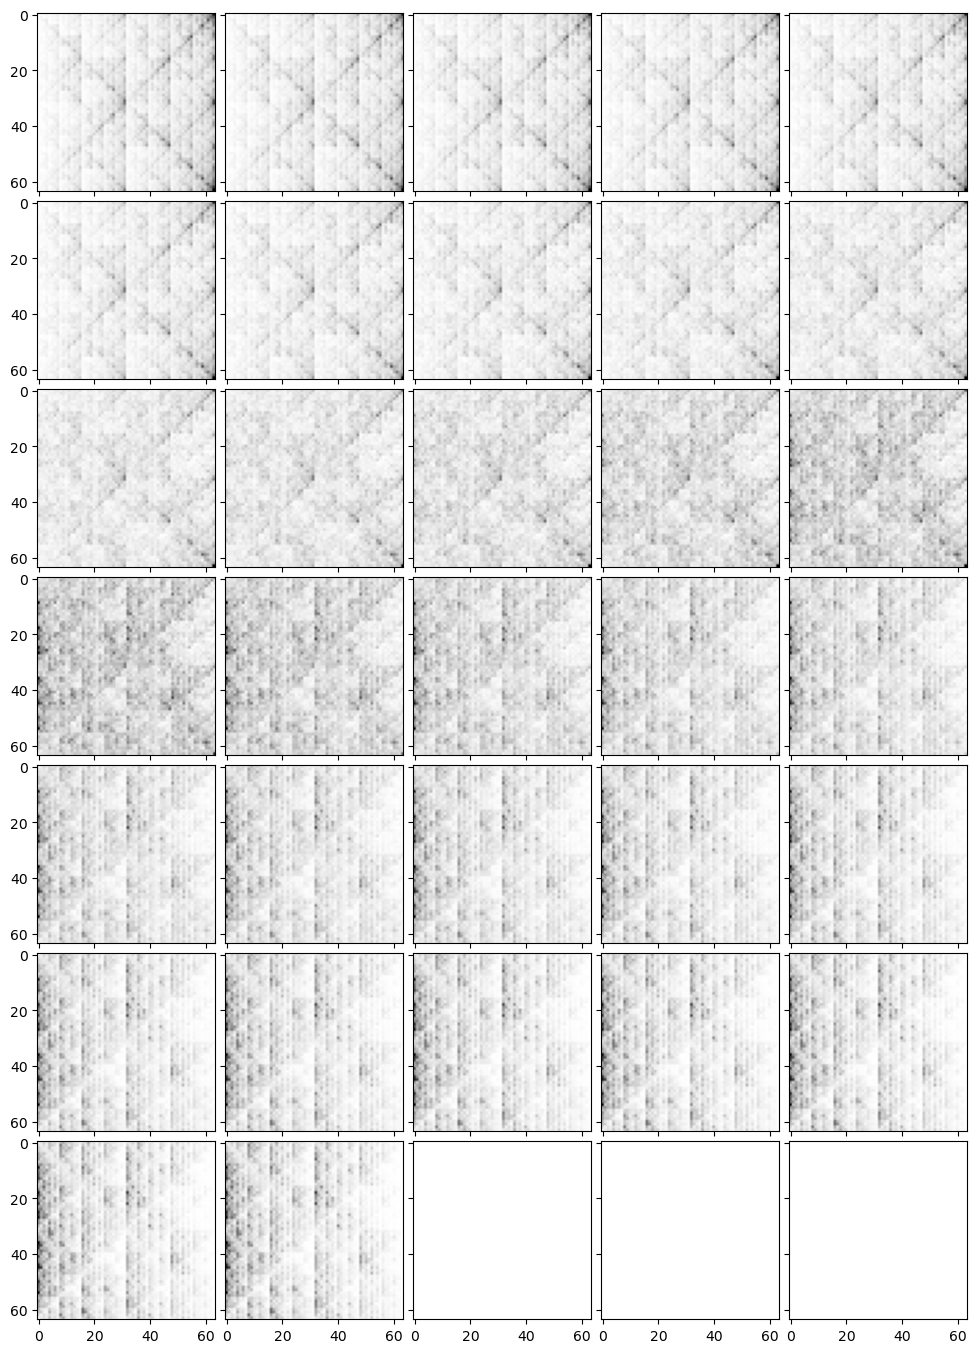

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(12,20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(nrows,ncols),
                 axes_pad=0.1,
                 )

for j, inp in enumerate(all_inputs):
    grid[j].imshow(FCGR(6).plot(inp),'gray',)
    

___

In [10]:
all_inputs=np.load(Path("../preds/inputs.npy"))
all_outputs=np.load(Path("../preds/outpuss.npy"))

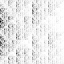

In [11]:
FCGR(6).plot(all_inputs[0])

In [12]:
img=FCGR(6).plot(all_outputs[0])
type(img)

PIL.Image.Image

Images from autoencoder`left`: inputs `right`: outputs

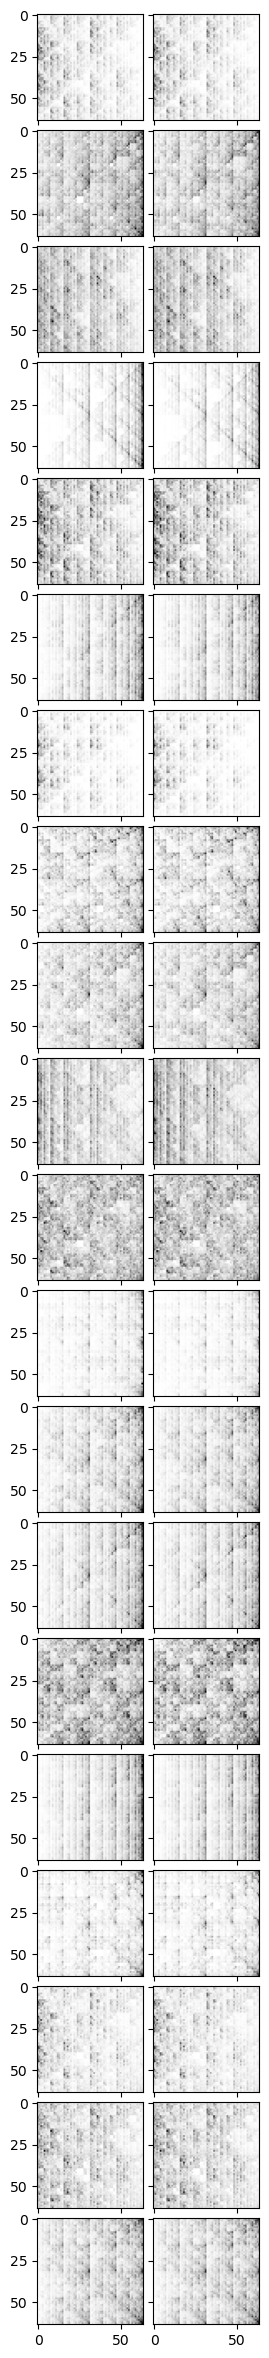

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(20,30))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(20,2),
                 axes_pad=0.1,
                 )
i=0
for inp, out in zip(all_inputs, all_outputs):
    grid[i].imshow(FCGR(6).plot(inp),'gray',)
    grid[i+1].imshow(FCGR(6).plot(out),'gray',)
    i+=2
    

___
### Visualize a set of images

In [44]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os

def display_images(
    images, k, 
    columns=5, width=25, height=8, max_images=30, 
    label_wrap_length=50, label_font_size=15,
    path_save=None):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    # height = max(height, int(len(images)/columns) * height)
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(hspace=.3)

    for i, image in enumerate(images):

        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        m=np.load(image)
        plt.imshow(FCGR(k).array2img(m),"gray")

        # if hasattr(image, 'filename'):
        title=Path(image).parent.stem.split("__")[0] + "|" + Path(image).stem 
        if title.endswith("/"): title = title[0:-1]
        title=os.path.basename(title)
        title=textwrap.wrap(title, label_wrap_length)
        title="\n".join(title)
        plt.title(title, fontsize=label_font_size)
    
    plt.tight_layout()
    
    if path_save:
        Path(path_save).parent.mkdir(exist_ok=True, parents=True)
        fig.savefig(path_save, dpi=300)
    # plt.close(fig)

___
### Outliers Train
From `notebooks/clean-lab.ipynb`

In [45]:
PATH_EXP = Path("/data/bacteria/experiments/autoencoders/6mer/27122023-5")
imgs_train = pd.read_csv( PATH_EXP.joinpath("test/outliers-train.csv"))
imgs_train["name"] = imgs_train.path_npy.apply(lambda p: pathlib.Path(p).parent.stem.split("__")[0])
imgs_train = imgs_train.sort_values(by="name")["path_npy"].tolist()

Showing 10 images of 400:


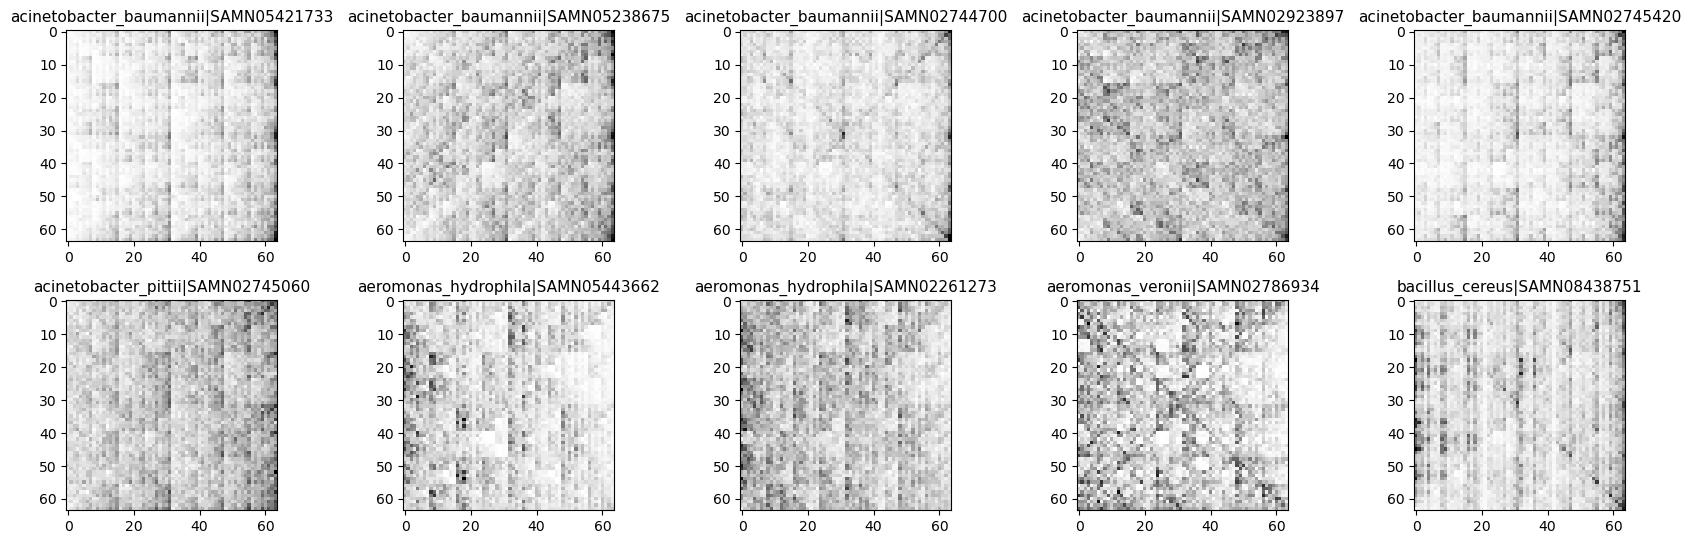

In [48]:
display_images(imgs_train, k=KMER, 
            columns=5, width=17, height=8, max_images=10, 
            label_wrap_length=50, label_font_size=11,
            path_save=f"../plots/{KMER}mers/complexcgr-readme.png")

In [7]:
display_images(imgs_train[30:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/outliers-train_31-60.png")

Showing 30 images of 370:


In [8]:
display_images(imgs_train[60:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/outliers-train_61-90.png")

Showing 30 images of 340:


In [9]:
display_images(imgs_train[90:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/outliers-train_91-100.png")

Showing 30 images of 310:


### Plot outliers in the  train set, include random examples from the same species

In [13]:
from collections import defaultdict
paths_by_specie = defaultdict(list)

PATH_FCGR=Path("/data/bacteria/experiments/autoencoders/6mer/fcgr/")
for path in imgs_train:
    name = Path(path).parent.stem.split("__")[0]
    paths_by_specie[name].append(path)

# step = 0
for name, list_paths in paths_by_specie.items():
    
    imgs = [p for p in Path(PATH_FCGR).joinpath(f"{name}__01").rglob("*.npy") if str(p) not in list_paths]
    
    print(f"{name} | {len(list_paths)} outliers | {len(imgs)} availables" )
    
    # for path in list_paths:
    imgs = list_paths + imgs

    display_images(imgs, k=KMER, max_images=20, path_save=f"../plots/{KMER}mers/outliers/train-{name}.png")
    
    # step +=1 
    # if step > 0: break
 

acinetobacter_baumannii | 5 outliers | 3995 availables
Showing 20 images of 4000:
acinetobacter_pittii | 1 outliers | 194 availables
Showing 20 images of 195:
aeromonas_hydrophila | 2 outliers | 167 availables
Showing 20 images of 169:
aeromonas_veronii | 1 outliers | 146 availables
Showing 20 images of 147:
bacillus_cereus | 3 outliers | 626 availables
Showing 20 images of 629:
bacillus_subtilis | 15 outliers | 630 availables
Showing 20 images of 645:
bacillus_thuringiensis | 15 outliers | 227 availables
Showing 20 images of 242:
bacteroides_fragilis | 8 outliers | 171 availables
Showing 20 images of 179:
bordetella_bronchiseptica | 1 outliers | 108 availables
Showing 20 images of 109:
borreliella_burgdorferi | 3 outliers | 246 availables
Showing 20 images of 249:
burkholderia_cenocepacia | 3 outliers | 384 availables
Showing 20 images of 387:
burkholderia_cepacia | 1 outliers | 171 availables
Showing 20 images of 172:
burkholderia_contaminans | 1 outliers | 125 availables
Showing 20 

: 

___
### Outliers Test
From `notebooks/clean-lab.ipynb`

In [10]:
PATH_EXP = Path("/data/bacteria/experiments/autoencoders/6mer/27122023-5")
imgs_test = pd.read_csv( PATH_EXP.joinpath("test/outliers-test.csv"))
imgs_test["name"] = imgs_test.path_npy.apply(lambda p: pathlib.Path(p).parent.stem.split("__")[0])
imgs_test = imgs_test.sort_values(by="name")["path_npy"].tolist()

In [11]:
display_images(imgs_test, k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/outliers-test.png")

Showing 30 images of 400:


### Plot outliers in the  test set, include random examples from the same species

In [12]:
paths_by_specie = defaultdict(list)

PATH_FCGR=Path("/data/bacteria/experiments/autoencoders/6mer/fcgr/")
for path in imgs_test:
    name = Path(path).parent.stem.split("__")[0]
    paths_by_specie[name].append(path)

for name, list_paths in paths_by_specie.items():
    imgs = [p for p in Path(PATH_FCGR).rglob(f"{name}*/*.npy") if str(p) not in list_paths]
    
    # for path in list_paths:
    imgs = list_paths + imgs

    display_images(imgs, k=KMER, max_images=20, path_save=f"../plots/{KMER}mers/outliers/test-{name}.png")

NameError: name 'defaultdict' is not defined

___
### Plot for one species in particular

In [ ]:
name = "enterococcus_faecalis"
imgs = list(Path(f'/data/bacteria/experiments/autoencoders/6mer/fcgr/{name}__01/').rglob("*.npy"))
display_images(imgs, k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/{name}.png")

___
___
# Plot one sample per species

In [49]:
from pathlib  import Path
KMER=6

imgs = [str(img) for img in list(Path(f"/data/bacteria/autoencoder-experiments/{KMER}mers/fcgr/").rglob("*npy"))]


In [50]:
from collections import defaultdict

path_by_species = defaultdict(list)
for img in imgs:
    name_species=Path(img).parent.stem.split("__")[0]
    path_by_species[name_species].append(img)
len(path_by_species)

143

In [57]:
img_display = [paths[0] for name, paths in path_by_species.items()]
len(img_display)

143

['/data/bacteria/autoencoder-experiments/6mers/fcgr/streptococcus_pneumoniae__05/SAMEA2658585.fa.npy',
 '/data/bacteria/autoencoder-experiments/6mers/fcgr/mycobacterium_tuberculosis__03/SAMEA1569115.fa.npy']

Showing 10 images of 143:


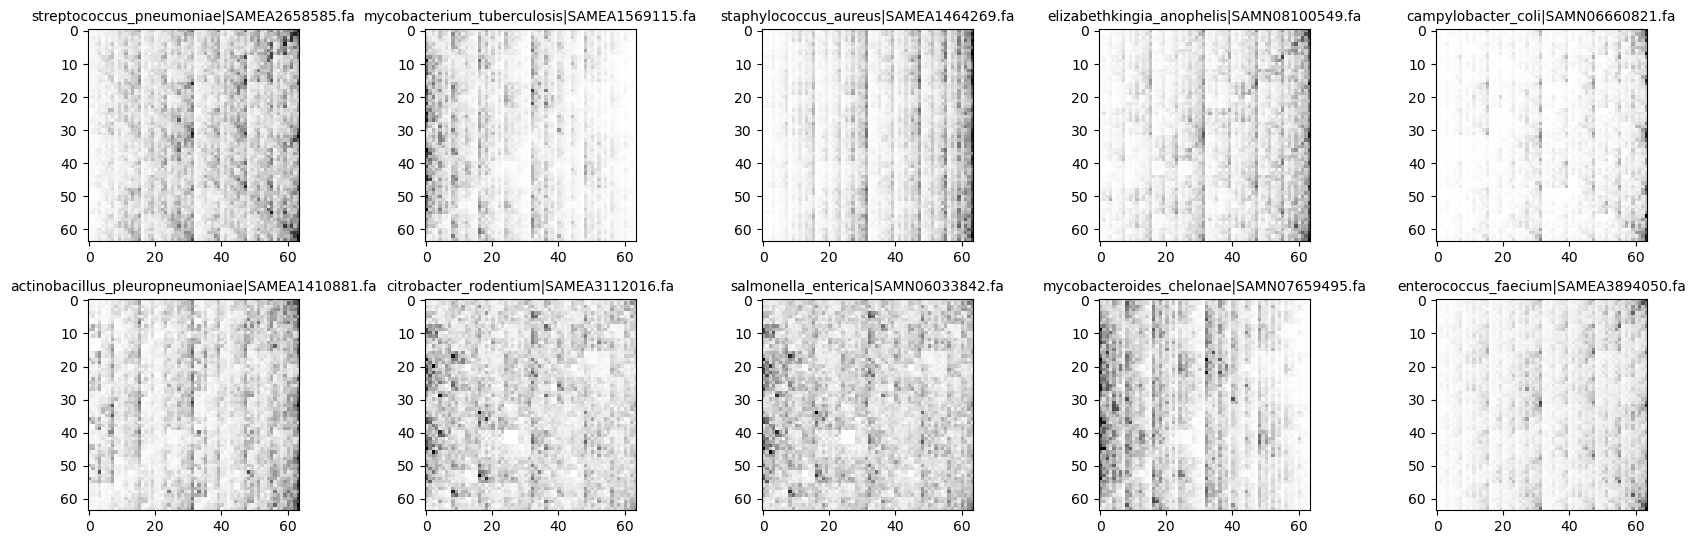

In [55]:
display_images(img_display, k=KMER, 
            columns=5, width=17, height=8, max_images=10, 
            label_wrap_length=50, label_font_size=10,
            path_save=f"../plots/{KMER}mers/complexcgr-readme.png")

In [ ]:
display_images(img_display, k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/outliers-bacteria_1-30.png")

In [ ]:
display_images(img_display[30:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_31-60.png")

In [ ]:
display_images(img_display[60:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_61-90.png")

In [ ]:
display_images(img_display[90:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_91-120.png")

In [ ]:
display_images(img_display[120:], k=KMER, max_images=30, path_save=f"../plots/{KMER}mers/bacteria_121-end.png")